## Clustering + PCA code

In [236]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# df = pd.read_csv('data/Test_Data_1102_enumerated.csv')
df = pd.read_csv('./data/Test_Data_1102_enumerated_filledin.csv')

In [237]:
## Standardize scores so PCA won't just weight the larger numbers
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [238]:
pca = PCA()
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Cumulative Explained Variance')

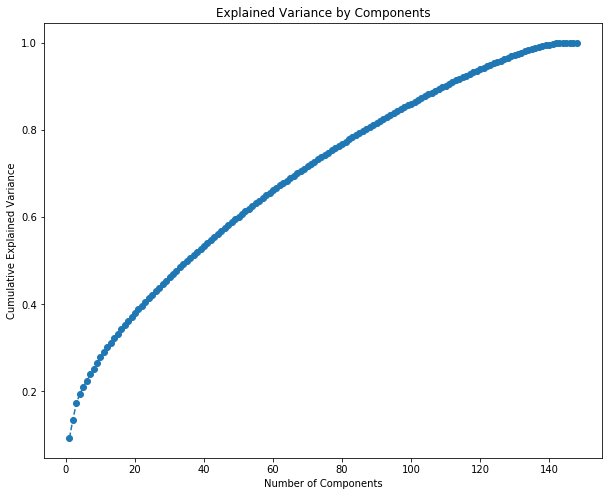

In [239]:
plt.figure(figsize = (10,8))
len_rat = len(pca.explained_variance_ratio_)+ 1
plt.plot(range(1, len_rat), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

### We want to keep around 80% of the variance- so choose 100

In [240]:
n_components = 100 #try a lower number since we have SO many
pca = PCA(n_components = n_components)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)

### Kmeans with PCA

In [241]:
#test number of clusters
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)


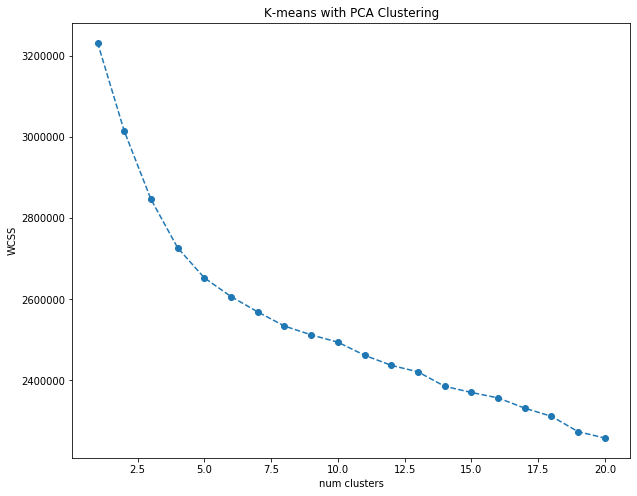

In [242]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('num clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [251]:
## Pick the elbow from above- about 5?
## And fit!
n_clusters = 5
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [252]:
#put the components and clusters into one big dataframe
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-n_components:] = ["Component " + str(i) for i in range(1, n_components + 1)]
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [253]:
df_segm_pca_kmeans.head()

,RedCapID,CaseCtrl,indexredcapid,Female,Age,Race,Spanish,Month_Birth,Year_Birth,Month_Death,...,Component 92,Component 93,Component 94,Component 95,Component 96,Component 97,Component 98,Component 99,Component 100,Segment K-means PCA
0,25,0,1221372,1.0,98.564380,5.0,0.0,9.0,1903.0,4.0,...,-0.118517,-0.370559,-0.356817,-0.227822,-0.121027,0.466324,-0.214767,-0.143508,-0.079244,0
1,210,0,1229858,0.0,88.608220,5.0,0.0,6.0,1918.0,1.0,...,0.026869,-0.440710,-0.585286,-0.205672,-0.358100,0.518811,-0.139896,-0.208040,-0.149699,0
2,500,0,1235588,1.0,35.039304,5.0,0.0,7.0,1957.0,1.0,...,-0.115995,-0.052193,0.088169,-0.027951,0.120968,0.035065,-0.132005,0.140518,0.025006,0
3,507,0,1220463,0.0,35.039304,5.0,0.0,10.0,1938.0,1.0,...,-0.090352,-0.127557,0.015848,-0.020402,0.137906,0.034076,-0.212770,0.028114,0.051729,0
4,610,0,1219461,1.0,35.039304,5.0,0.0,7.0,1950.0,1.0,...,-0.181064,-0.129245,0.063089,-0.072835,0.142185,0.150910,-0.267780,0.115910,0.017348,0


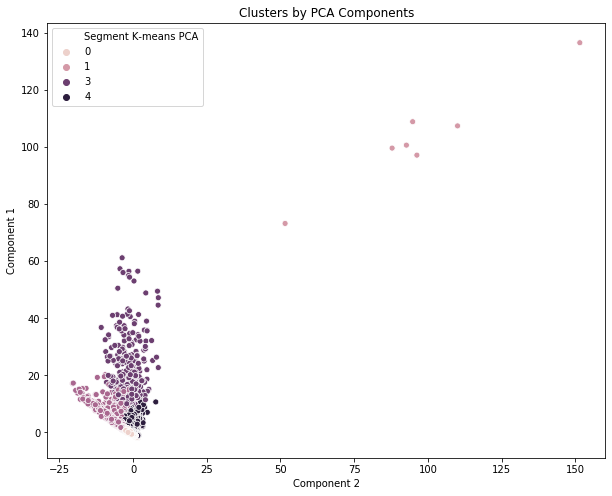

In [254]:
#Look at it!
import seaborn as sns

x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Segment K-means PCA'])
plt.title('Clusters by PCA Components')
plt.show()

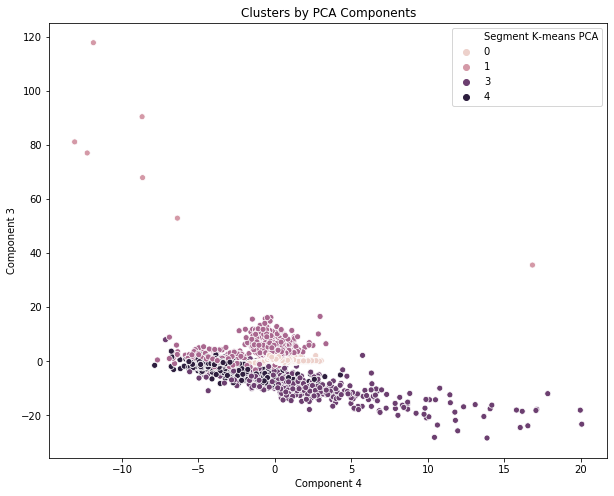

In [255]:
x_axis = df_segm_pca_kmeans['Component 4']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Segment K-means PCA'])
plt.title('Clusters by PCA Components')
plt.show()

In [256]:
#Check out what the cluster distributions look like
features = ['CaseCtrl', 'Female', 'Age', 'Race',
       'Spanish', 'Month_Birth', 'Year_Birth', 'Month_Death',
       'Year_Death', 'EducationMax', 'EgoMaritalStatus', 'methoddeath',
       'violent']
df_segm_pca_kmeans[["Segment K-means PCA", "CaseCtrl", "Female", "Age", "Race", "Spanish", "EducationMax", "EgoMaritalStatus", "methoddeath"]].groupby("Segment K-means PCA").mean()


,CaseCtrl,Female,Age,Race,Spanish,EducationMax,EgoMaritalStatus,methoddeath
Segment K-means PCA,,,,,,,,
0,0.000411,0.168397,38.307240,5.207965,-0.138232,2.569424,1.927852,-0.994707
1,1.000000,0.428571,23.922504,5.142857,0.142857,1.857143,3.285714,3.142857
2,0.095666,0.225687,33.739476,5.147992,0.069767,2.061311,2.057082,-0.710359
3,1.000000,0.306667,20.938391,5.050667,0.194667,1.784000,2.488000,2.101333
4,0.981092,0.156591,20.187346,4.895606,-0.128628,1.743808,2.031158,2.357923


In [257]:
#check the medians- better idea of centerpoints
df_segm_pca_kmeans[["Segment K-means PCA", "CaseCtrl", "Female", "Age", "Race", "Spanish", "EducationMax", "EgoMaritalStatus", "methoddeath"]].groupby("Segment K-means PCA").median()


,CaseCtrl,Female,Age,Race,Spanish,EducationMax,EgoMaritalStatus,methoddeath
Segment K-means PCA,,,,,,,,
0,0,0.0,35.039304,5.0,0.0,2.0,2.0,-1.0
1,1,0.0,25.000000,5.0,0.0,2.0,4.0,2.0
2,0,0.0,35.039304,5.0,0.0,2.0,2.0,-1.0
3,1,0.0,21.087670,5.0,0.0,2.0,2.0,2.0
4,1,0.0,20.000000,5.0,0.0,2.0,2.0,2.0


In [265]:
#cluster sizes
for i in np.unique(kmeans_pca.labels_):
    print(i, len(kmeans_pca.labels_[kmeans_pca.labels_ == i])/len(kmeans_pca.labels_))

0 0.763466593432461
1 0.0002746282710188709
2 0.07422809839538624
3 0.014712228804582369
4 0.14731845109655145


## Hierarchical Clustering

In [258]:
#do the clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(scores_pca)

array([2, 2, 2, ..., 3, 3, 3], dtype=int64)

In [259]:
df_segm_pca_agclust = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_agclust.columns.values[-n_components:] = ["Component " + str(i) for i in range(1, n_components + 1)]
df_segm_pca_agclust['Segment K-means PCA'] = cluster.labels_

In [260]:
df_segm_pca_agclust.head()

,RedCapID,CaseCtrl,indexredcapid,Female,Age,Race,Spanish,Month_Birth,Year_Birth,Month_Death,...,Component 92,Component 93,Component 94,Component 95,Component 96,Component 97,Component 98,Component 99,Component 100,Segment K-means PCA
0,25,0,1221372,1.0,98.564380,5.0,0.0,9.0,1903.0,4.0,...,-0.118517,-0.370559,-0.356817,-0.227822,-0.121027,0.466324,-0.214767,-0.143508,-0.079244,2
1,210,0,1229858,0.0,88.608220,5.0,0.0,6.0,1918.0,1.0,...,0.026869,-0.440710,-0.585286,-0.205672,-0.358100,0.518811,-0.139896,-0.208040,-0.149699,2
2,500,0,1235588,1.0,35.039304,5.0,0.0,7.0,1957.0,1.0,...,-0.115995,-0.052193,0.088169,-0.027951,0.120968,0.035065,-0.132005,0.140518,0.025006,2
3,507,0,1220463,0.0,35.039304,5.0,0.0,10.0,1938.0,1.0,...,-0.090352,-0.127557,0.015848,-0.020402,0.137906,0.034076,-0.212770,0.028114,0.051729,2
4,610,0,1219461,1.0,35.039304,5.0,0.0,7.0,1950.0,1.0,...,-0.181064,-0.129245,0.063089,-0.072835,0.142185,0.150910,-0.267780,0.115910,0.017348,2


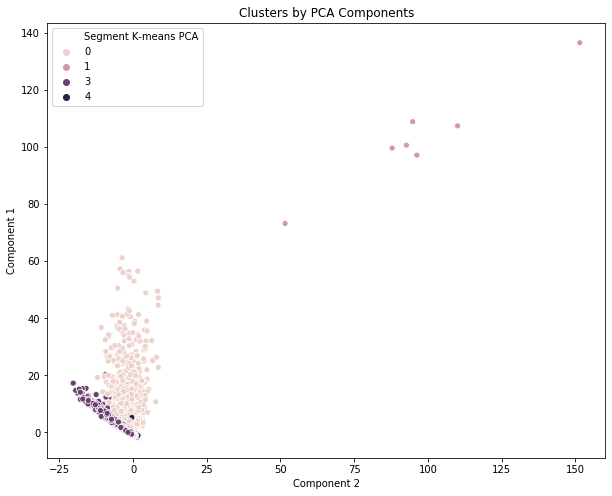

In [261]:
x_axis = df_segm_pca_agclust['Component 2']
y_axis = df_segm_pca_agclust['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_agclust['Segment K-means PCA'])
plt.title('Clusters by PCA Components')
plt.show()

In [262]:
for i in np.unique(cluster.labels_):
    print(i, len(cluster.labels_[cluster.labels_ == i])/len(cluster.labels_))


0 0.041704264584722824
1 0.0002746282710188709
2 0.6272117383969555
3 0.22103652556004552
4 0.10977284318725725


In [263]:
#check out the cluster means
df_segm_pca_agclust[["Segment K-means PCA", "CaseCtrl", "Female", "Age", "Race", "Spanish", "EducationMax", "EgoMaritalStatus", "methoddeath"]].groupby("Segment K-means PCA").mean()


,CaseCtrl,Female,Age,Race,Spanish,EducationMax,EgoMaritalStatus,methoddeath
Segment K-means PCA,,,,,,,,
0,1.000000,0.212606,20.308034,4.967074,0.151458,1.684854,2.413923,1.854186
1,1.000000,0.428571,23.922504,5.142857,0.142857,1.857143,3.285714,3.142857
2,0.007756,0.160005,38.919080,5.163633,-0.137925,2.626947,1.909552,-0.964909
3,0.053781,0.210863,34.263534,5.228435,-0.064785,2.196841,2.024494,-0.824281
4,0.985704,0.155468,20.057838,5.030736,-0.199786,1.770193,1.954253,2.516083


In [264]:
#cluster medians
df_segm_pca_agclust[["Segment K-means PCA", "CaseCtrl", "Female", "Age", "Race", "Spanish", "EducationMax", "EgoMaritalStatus", "methoddeath"]].groupby("Segment K-means PCA").median()


,CaseCtrl,Female,Age,Race,Spanish,EducationMax,EgoMaritalStatus,methoddeath
Segment K-means PCA,,,,,,,,
0,1,0.0,21.000000,5.0,0.0,2.0,2.0,2.0
1,1,0.0,25.000000,5.0,0.0,2.0,4.0,2.0
2,0,0.0,35.039304,5.0,0.0,2.0,2.0,-1.0
3,0,0.0,35.039304,5.0,0.0,2.0,2.0,-1.0
4,1,0.0,20.000000,5.0,0.0,2.0,2.0,1.0
